In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('shipment_data.csv')

In [3]:
data.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [4]:
data.dtypes

,0
Shipment ID,object
Origin,object
Destination,object
Shipment Date,object
Planned Delivery Date,object
Actual Delivery Date,object
Vehicle Type,object
Distance (km),int64
Weather Conditions,object
Traffic Conditions,object


In [5]:
#handling missing values
data['Vehicle Type'].fillna(data['Vehicle Type'].mode()[0], inplace=True)

<ipython-input-5-04c2c3a0590e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Vehicle Type'].fillna(data['Vehicle Type'].mode()[0], inplace=True)


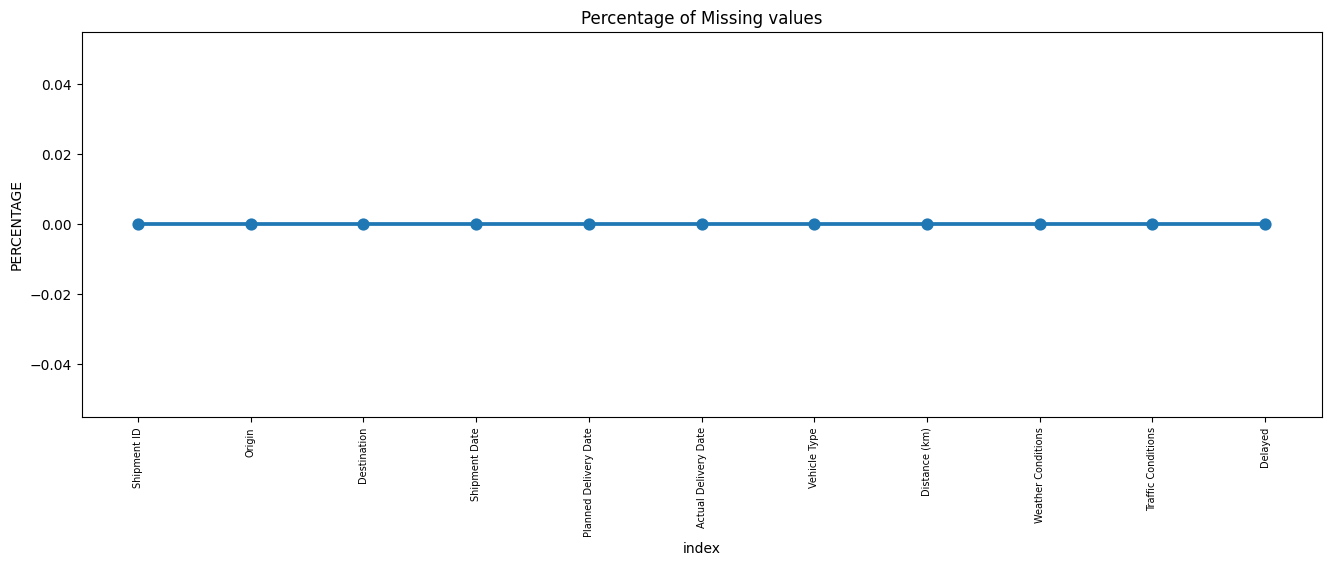

In [6]:
#handle missing values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [7]:
#label encoding columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Vehicle Type']=le.fit_transform(data['Vehicle Type'])
data['Weather Conditions']=le.fit_transform(data['Weather Conditions'])
data['Delayed']=le.fit_transform(data['Delayed'])
data['Origin']=le.fit_transform(data['Origin'])
data['Destination']=le.fit_transform(data['Destination'])


1-yes,
0-no

clear 0,
Fogg 1,
rain 2,
storm 3


0.   Ahmedabad
1.   Bangalore
2.   Chennai
3.   Delhi
4.   Hyderabad
5.   Jaipur
6.   Kolkata
7.   Lucknow
8.   Mumbai
9.    Pune



In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop=None, sparse_output=False)
traffic_reshaped = data['Traffic Conditions'].values.reshape(-1, 1)

# Fit and transform the 'Traffic Conditions' column
encoded_traffic = encoder.fit_transform(traffic_reshaped)

# Convert the encoded values into a DataFrame with appropriate column names
encoded_traffic_df = pd.DataFrame(encoded_traffic, columns=encoder.get_feature_names_out(['Traffic Conditions']))

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, encoded_traffic_df], axis=1)

# Optionally, drop the original 'Traffic Conditions' column if needed
data.drop('Traffic Conditions', axis=1, inplace=True)

In [9]:
data.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Delayed,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate
0,SHIP000000,5,8,2023-04-26,2023-05-01,2023-05-02,2,1603,2,1,0.0,1.0,0.0
1,SHIP000001,1,3,2023-02-09,2023-02-13,2023-02-17,2,1237,3,1,0.0,0.0,1.0
2,SHIP000002,8,2,2023-09-19,2023-09-25,2023-09-25,3,1863,0,0,0.0,1.0,0.0
3,SHIP000003,4,0,2023-04-01,2023-04-05,2023-04-05,0,1374,0,0,0.0,1.0,0.0
4,SHIP000004,2,6,2023-11-24,2023-11-26,2023-11-28,0,676,0,1,1.0,0.0,0.0


In [10]:
# Strip leading/trailing whitespaces from all date columns
data['Shipment Date'] = data['Shipment Date'].str.strip()
data['Planned Delivery Date'] = data['Planned Delivery Date'].str.strip()
data['Actual Delivery Date'] = data['Actual Delivery Date'].str.strip()

In [11]:
# Convert the columns to datetime format
data['Shipment Date'] = pd.to_datetime(data['Shipment Date'], errors='coerce')
data['Planned Delivery Date'] = pd.to_datetime(data['Planned Delivery Date'], errors='coerce')
data['Actual Delivery Date'] = pd.to_datetime(data['Actual Delivery Date'], errors='coerce')

In [12]:
data['Planned_Duration'] = data['Planned Delivery Date'] - data['Shipment Date']

In [13]:
data['Delay_Duration'] = data['Actual Delivery Date'] - data['Planned Delivery Date']

In [14]:
data.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Delayed,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Planned_Duration,Delay_Duration
0,SHIP000000,5,8,2023-04-26,2023-05-01,2023-05-02,2,1603,2,1,0.0,1.0,0.0,5 days,1 days
1,SHIP000001,1,3,2023-02-09,2023-02-13,2023-02-17,2,1237,3,1,0.0,0.0,1.0,4 days,4 days
2,SHIP000002,8,2,2023-09-19,2023-09-25,2023-09-25,3,1863,0,0,0.0,1.0,0.0,6 days,0 days
3,SHIP000003,4,0,2023-04-01,2023-04-05,2023-04-05,0,1374,0,0,0.0,1.0,0.0,4 days,0 days
4,SHIP000004,2,6,2023-11-24,2023-11-26,2023-11-28,0,676,0,1,1.0,0.0,0.0,2 days,2 days


In [15]:
# Drop unnecessary columns
columns_to_drop = ['Shipment ID', 'Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date']
data = data.drop(columns=columns_to_drop, axis=1)

In [16]:
data.head()

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Delayed,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Planned_Duration,Delay_Duration
0,5,8,2,1603,2,1,0.0,1.0,0.0,5 days,1 days
1,1,3,2,1237,3,1,0.0,0.0,1.0,4 days,4 days
2,8,2,3,1863,0,0,0.0,1.0,0.0,6 days,0 days
3,4,0,0,1374,0,0,0.0,1.0,0.0,4 days,0 days
4,2,6,0,676,0,1,1.0,0.0,0.0,2 days,2 days


In [17]:
data['Planned_Duration_numeric'] = data['Planned_Duration'].dt.days  # Extract only the days as integer
data['Delay_Duration_numeric'] = data['Delay_Duration'].dt.days

In [18]:
print(data[['Planned_Duration_numeric', 'Delay_Duration_numeric']].head())

   Planned_Duration_numeric  Delay_Duration_numeric
0                         5                       1
1                         4                       4
2                         6                       0
3                         4                       0
4                         2                       2


In [19]:
data = data.drop(columns=['Planned_Duration', 'Delay_Duration'], axis=1)

In [20]:
data.dtypes

,0
Origin,int64
Destination,int64
Vehicle Type,int64
Distance (km),int64
Weather Conditions,int64
Delayed,int64
Traffic Conditions_Heavy,float64
Traffic Conditions_Light,float64
Traffic Conditions_Moderate,float64
Planned_Duration_numeric,int64


In [21]:
#model training
X = data.drop(columns=['Delayed'])
y = data['Delayed']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
print(X_train.shape)  # Training data shape
print(X_test.shape)   # Test data shape

(16000, 10)
(4000, 10)


In [25]:
#logistic regression
model=LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00      2951

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
print({
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

{'Accuracy': 0.9995, 'Precision': 1.0, 'Recall': 0.9993222636394442, 'F1-Score': 0.9996610169491525}


In [28]:
print(f"Confusion Matrix: {conf_matrix}")

Confusion Matrix: [[1049    0]
 [   2 2949]]


In [29]:
#decision tree
model2=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, random_state=42)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00      2951

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [37]:
accuracy1 = accuracy_score(y_test, y_pred2)
precision1 = precision_score(y_test, y_pred2, average='binary')
recall1 = recall_score(y_test, y_pred2, average='binary')
f1_ = f1_score(y_test, y_pred2, average='binary')
conf_matrix_ = confusion_matrix(y_test, y_pred2)

In [38]:
print({
        "Accuracy": accuracy1,
        "Precision": precision1,
        "Recall": recall1,
        "F1-Score": f1_
    })

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


In [39]:
print(f"Confusion Matrix: {conf_matrix_}")

Confusion Matrix: [[1049    0]
 [   0 2951]]


In [33]:
model3=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42, verbose=0)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00      2951

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [40]:
accuracy2 = accuracy_score(y_test, y_pred3)
precision2 = precision_score(y_test, y_pred3, average='binary')
recall2 = recall_score(y_test, y_pred3, average='binary')
f1_rt = f1_score(y_test, y_pred3, average='binary')
conf_matrix_rt = confusion_matrix(y_test, y_pred3)

In [41]:
print({
        "Accuracy": accuracy2,
        "Precision": precision2,
        "Recall": recall2,
        "F1-Score": f1_rt
    })

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


In [42]:
print(f"Confusion Matrix: {conf_matrix_rt}")

Confusion Matrix: [[1049    0]
 [   0 2951]]


In [43]:
#saving the model
import pickle

In [44]:
model_filename = 'shipment_delay_modellr.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {model_filename}")

Model saved as shipment_delay_modellr.pkl


In [45]:
model_filename = 'shipment_delay_modeldt.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(model2, file)

print(f"Model saved as {model_filename}")

Model saved as shipment_delay_modeldt.pkl


In [46]:
model_filename = 'shipment_delay_modelrt.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(model3, file)

print(f"Model saved as {model_filename}")

Model saved as shipment_delay_modelrt.pkl
